In [1]:
# library imports
import csv
import nltk
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup, SoupStrainer
import requests

# Choose archive you want to explore

In [2]:
url = "https://wayback.archive-it.org/227/*/https://www.ndp.ca/" # URL of the archive you want to exp
image_folder = "homepage-images-ndp/" # folder to save images in
image_extension = "-ndp.png"
csv_file = "thumbnail_metrics.csv" # csv file where we'll save the results

In [3]:
# obtain links in the archive 

page = requests.get(url)    
data = page.text
soup = BeautifulSoup(data)
wayback_links = []
for link in soup.find_all('a'):
    if link.get('href').startswith('https://wayback.archive-it.org/227/'):
        wayback_links.append(link.get('href')) # grab all the links from the archive of correct format

# Screenshot homepages

In [4]:
# only need to run this cell once - once have images saved, can reuse

from selenium import webdriver

DRIVER = 'chromedriver'
driver = webdriver.Chrome(DRIVER)

count=1
for page in wayback_links:
    driver.get(page);
    export_file=image_folder+str(count)+image_extension
    count=count+1
    screenshot = driver.save_screenshot(export_file)
    
driver.quit()

NameError: name 'impage_extension' is not defined

# Image Analysis Functions

In [5]:
# import the necessary packages
from skimage import measure # pip3 install scikit-image
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [6]:
# we use the ssim metric to compare images
# this takes on a value between (-1,1), where 1
# is only achievable for identical images
# negative values occur when the covariance btwn images is negative
# we shift range to be between 0 and 1 (with 0 = same image):
# 1 - (1 + SSIM)/2


# mse directly compares pixels - not so useful in this context

def mse(imageA, imageB):
	# the 'Mean Squared Error' between the two images is the
	# sum of the squared difference between the two images;
	# NOTE: the two images must have the same dimension
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	
	# return the MSE, the lower the error, the more "similar"
	# the two images are
	return err

# use this function to check whether > 80% of pixels are white - i.e. a wayback
# render fail

def check_fail(imageA):
    # we say the wayback failed if the image is 80% white
    num_pixels = np.size(imageA.astype("float"))
    num_white = np.sum(imageA.astype("float")==255)
    if num_white/num_pixels > 0.8:
        return 1
    else:
        return 0

# this function could be used to compare mse with ssim result

def compare_images(imageA, imageB, title):
	# compute the mean squared error and structural similarity
	# index for the images
	m = mse(imageA, imageB)
	s = measure.compare_ssim(imageA, imageB)

	# setup the figure
	fig = plt.figure(title)
	plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))

	# show first image
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(imageA, cmap = plt.cm.gray)
	plt.axis("off")

	# show the second image
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(imageB, cmap = plt.cm.gray)
	plt.axis("off")

	# show the images
	plt.show()

# Compare thumbnails between dates

In [7]:
s = []
images = []
for x in range(0,len(wayback_links)-1):
    a = x+1
    b = x+2
    A = "/Users/jessicawilliams/ipsw-quantifying-change/homepage-images-ndp/%i-ndp.png" % a
    B = "/Users/jessicawilliams/ipsw-quantifying-change/homepage-images-ndp/%i-ndp.png" % b
    imgA = cv2.imread(A)
    images.append(A)
    imgB = cv2.imread(B)
    # convert the images to grayscale
    imgA = cv2.cvtColor(imgA, cv2.COLOR_BGR2GRAY)
    imgB = cv2.cvtColor(imgB, cv2.COLOR_BGR2GRAY)
    # compare the images
    # compare_images(old, new, "Old vs. New")
    s.append(1-(1+measure.compare_ssim(imgA, imgB))/2) # compare image A and image B with shifted SSIM
    if check_fail(imgA) or check_fail(imgB):
        s[x] = -10 # assign a value of -10 if the wayback failed
    
images.append(B)

error: OpenCV(4.1.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [11]:
len(wayback_links)

109

In [12]:
dates = []
for x in range(0,len(wayback_links)):
    dates.append(wayback_links[x].split("/")[4]) # create an array with the dates

# Plot data

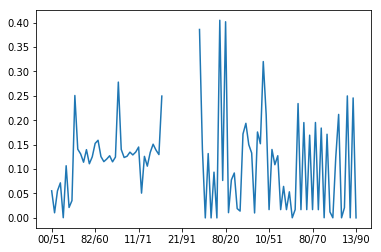

In [13]:
N = 15 # add tick every N dates
s_plot = s[:]
for i in range(0,len(s)):
    if s[i] == -10:
        s_plot[i] = np.nan

my_xticks = []
for i in range (0,len(dates)-1,N):
    my_xticks.append(str(dates[i][5:7] + "/" + dates[i][3:5]));
plt.plot(s_plot);
plt.xticks(range(0,len(dates)-1,N), my_xticks);

# Sort from most different to most similar 

0


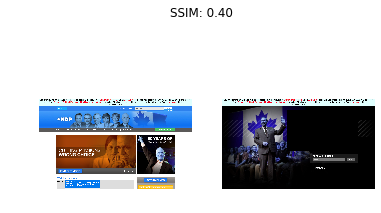

1


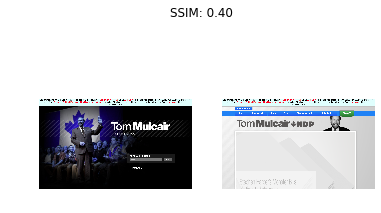

2


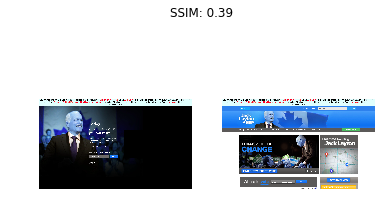

3


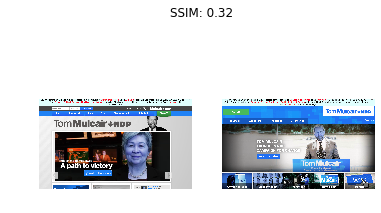

4


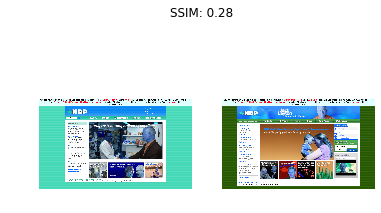

5


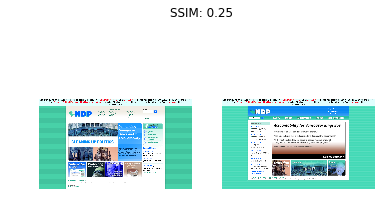

6


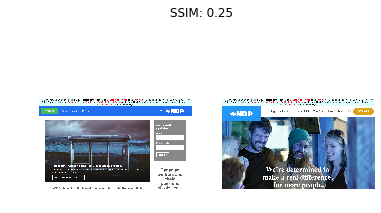

7


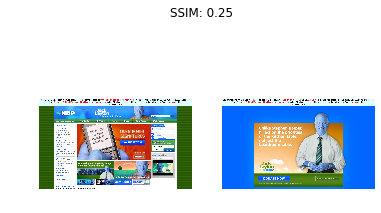

8


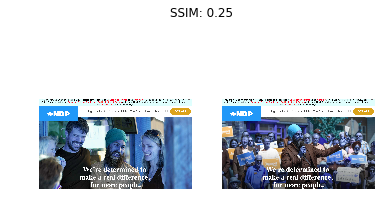

9


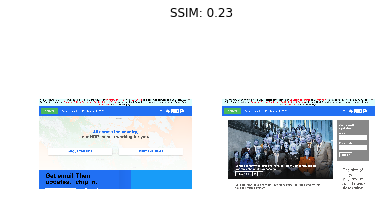

10


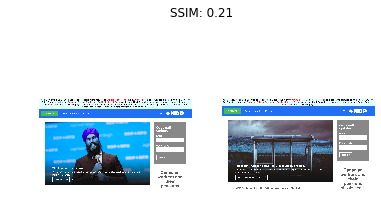

11


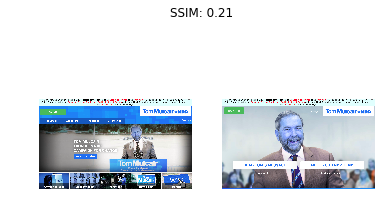

12


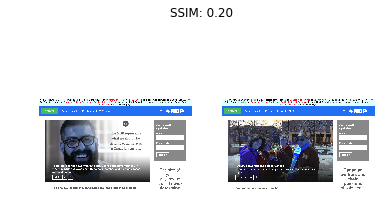

13


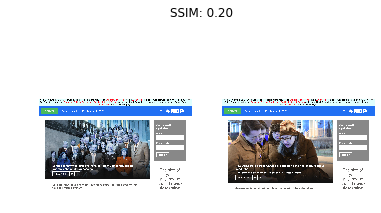

14


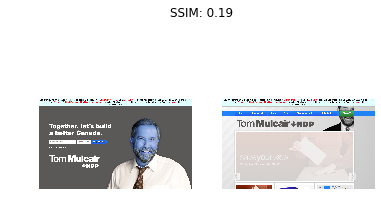

15


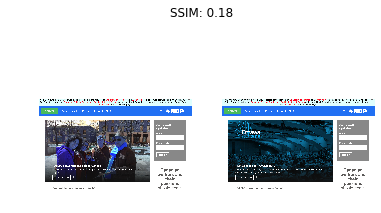

16


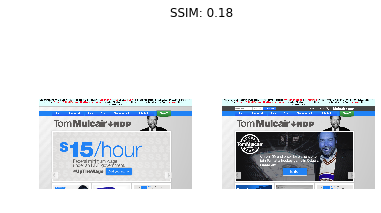

17


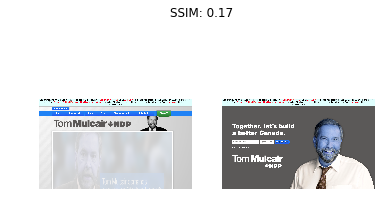

18


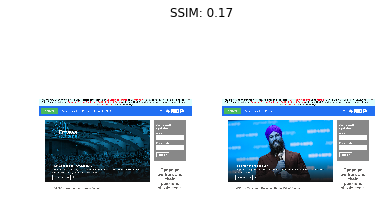

19


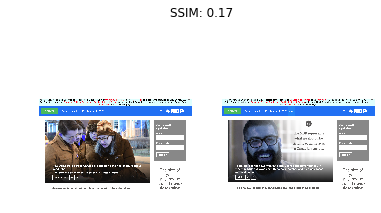

20


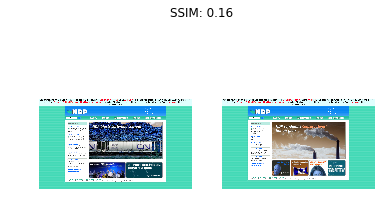

21


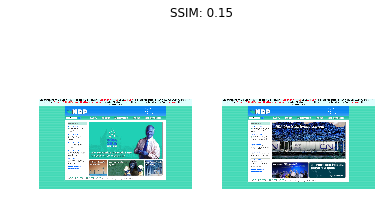

22


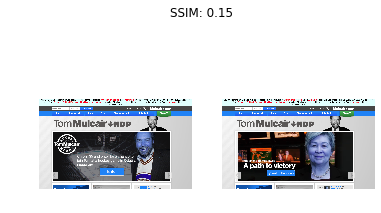

23


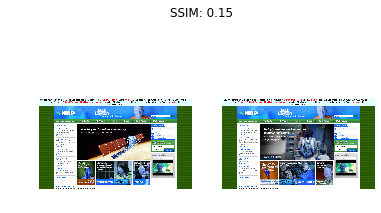

24


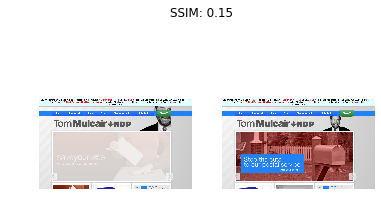

25


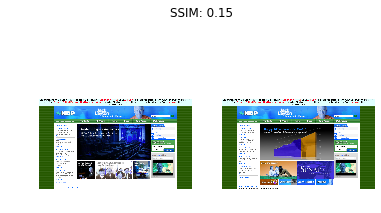

26


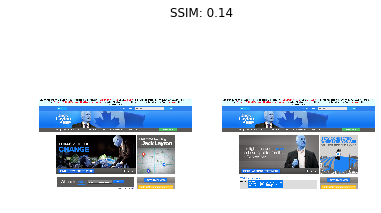

27


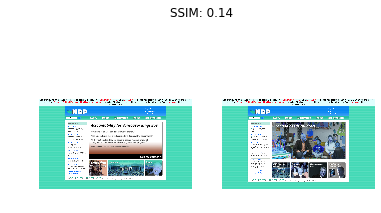

28


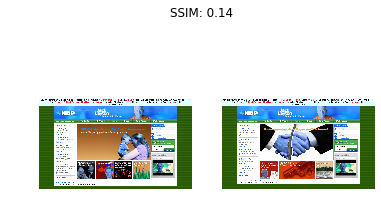

29


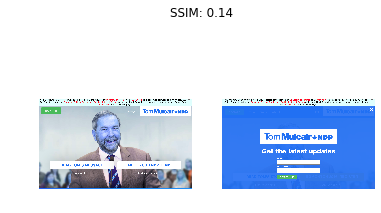

30


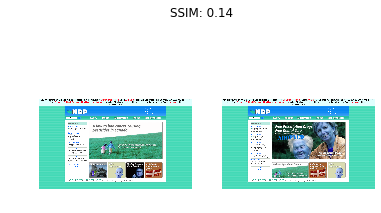

31


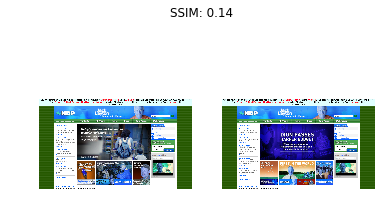

32


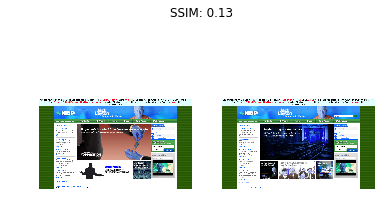

33


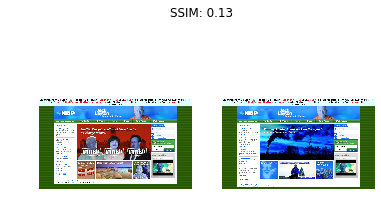

34


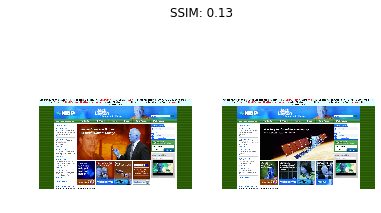

35


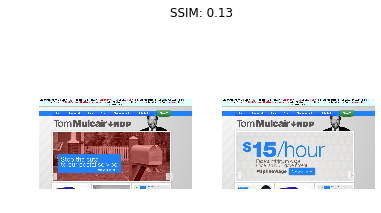

36


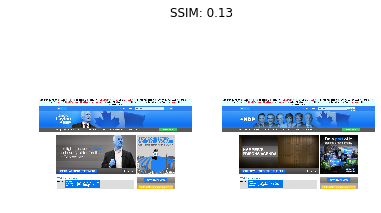

37


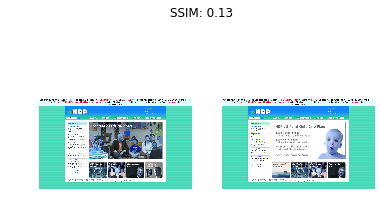

38


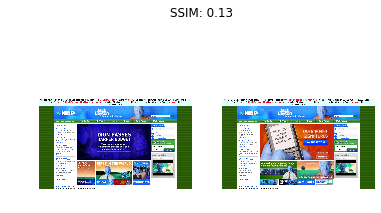

39


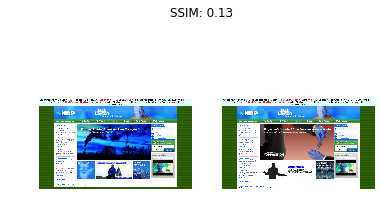

40


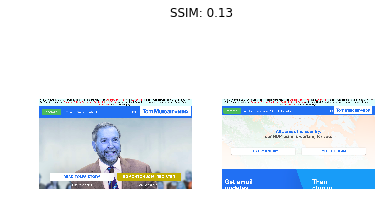

41


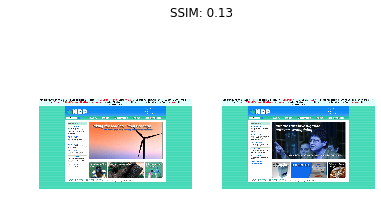

42


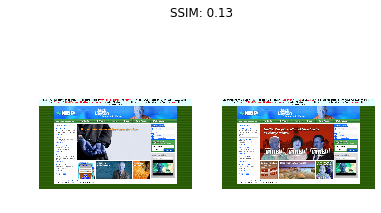

43


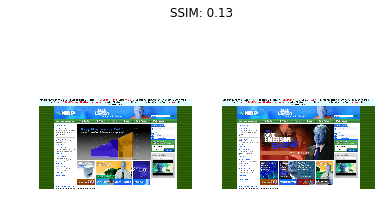

44


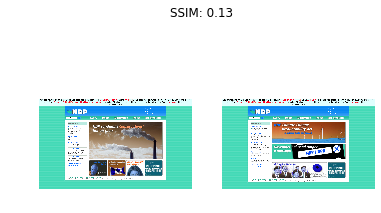

45


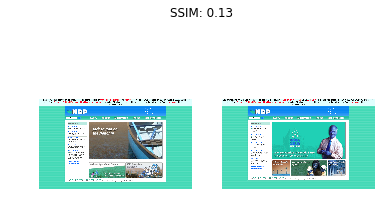

46


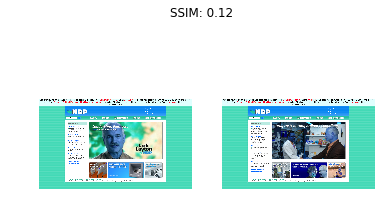

47


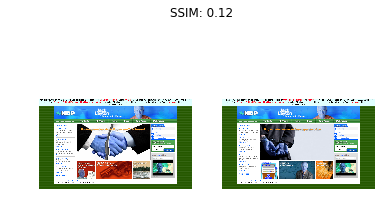

48


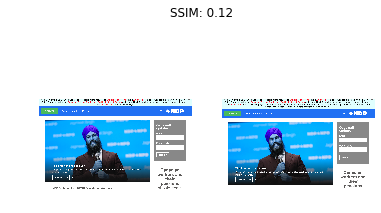

49


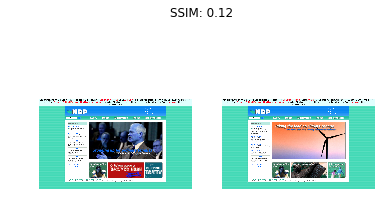

50


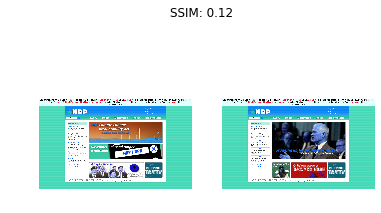

51


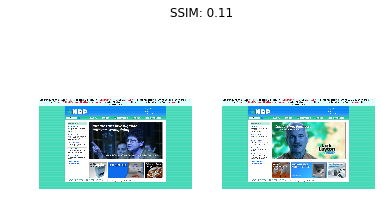

52


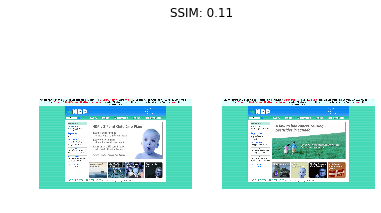

53


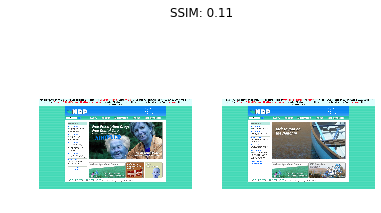

54


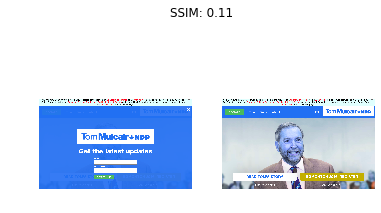

55


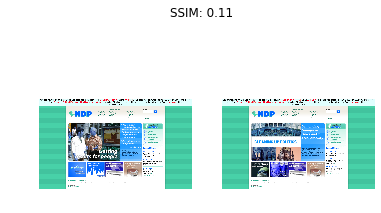

56


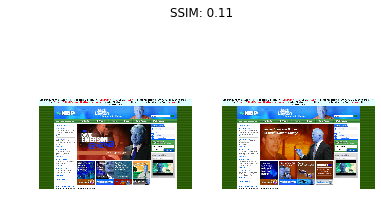

57


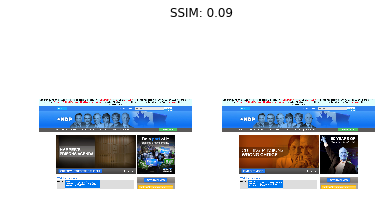

58


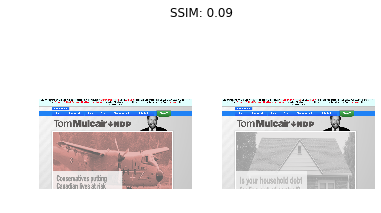

59


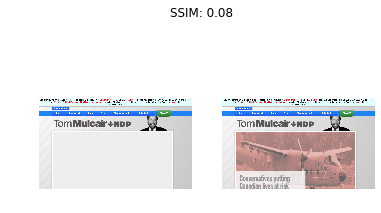

60


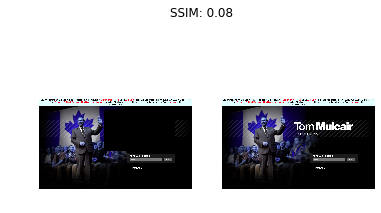

61


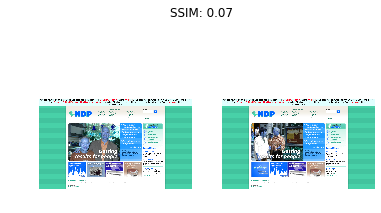

62


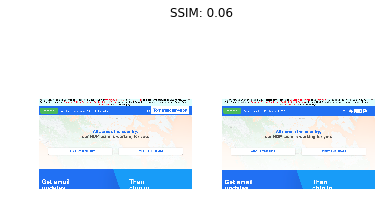

63


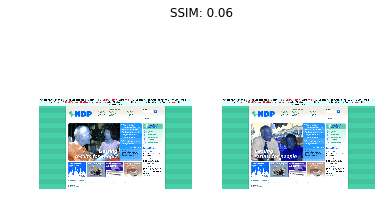

64


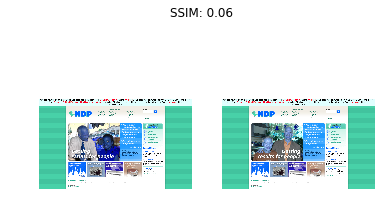

65


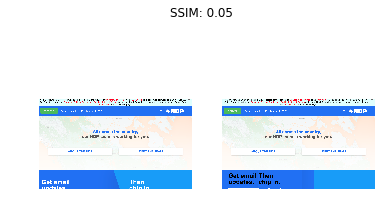

66


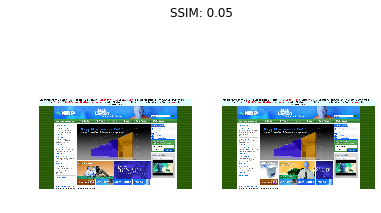

67


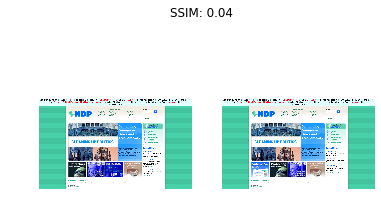

68


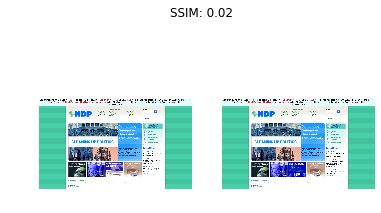

69


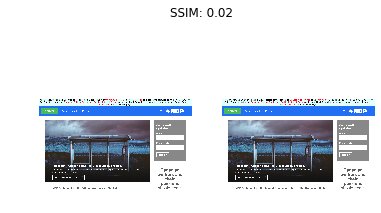

70


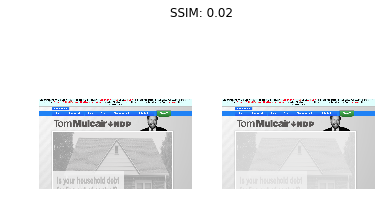

71


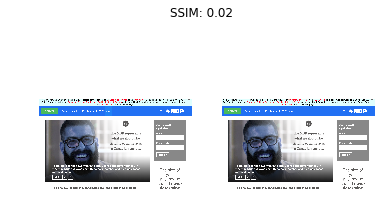

72


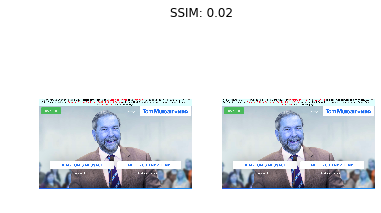

73


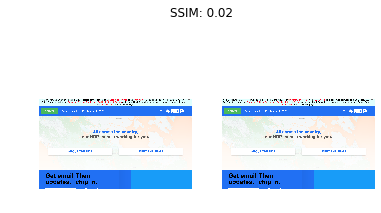

74


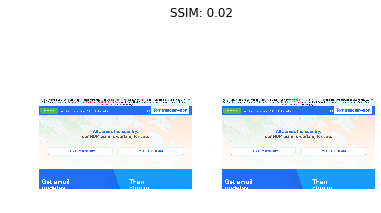

75


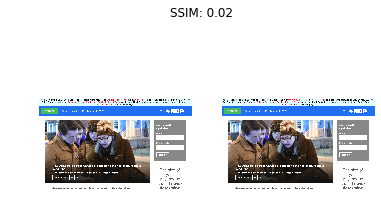

76


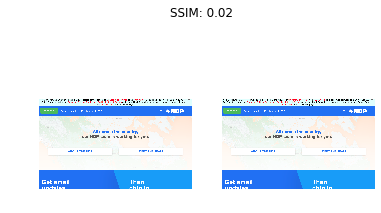

77


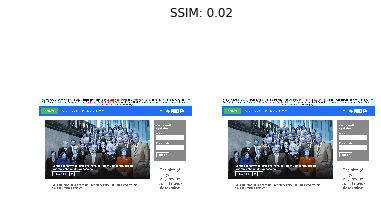

78


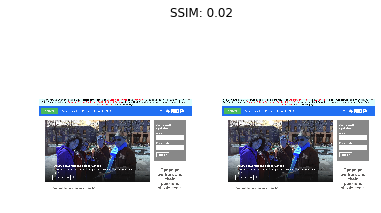

79


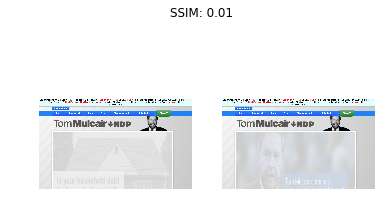

80


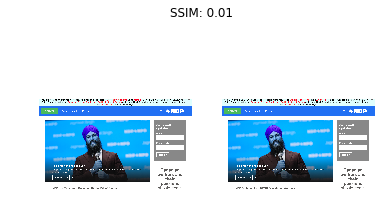

81


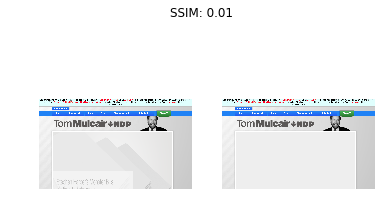

82


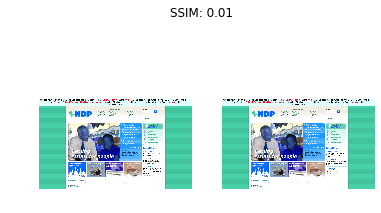

83


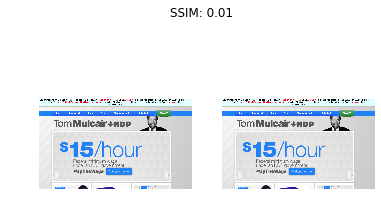

84


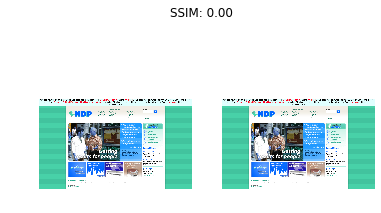

85


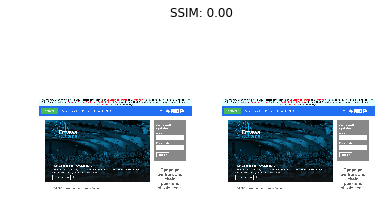

86


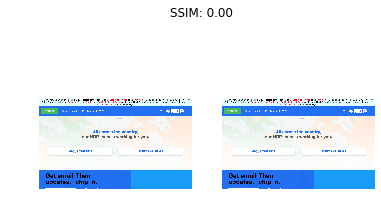

87


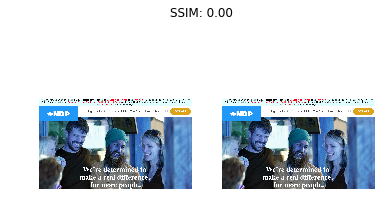

88


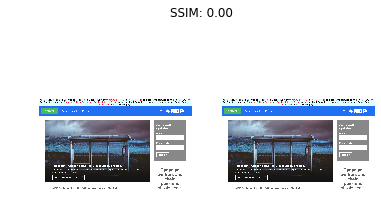

89


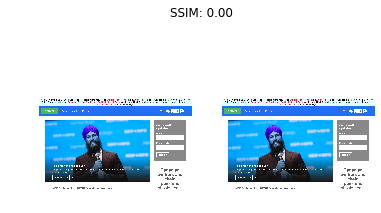

90


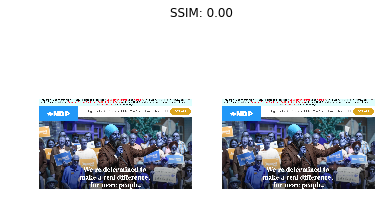

91


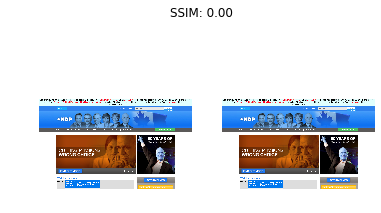

92


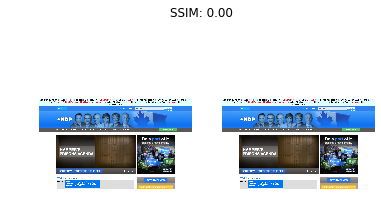

93


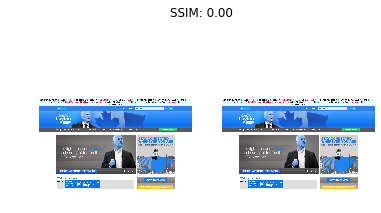

94


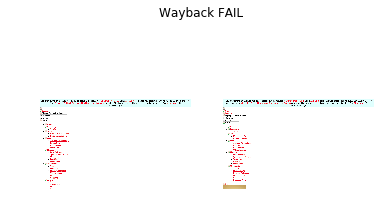

95


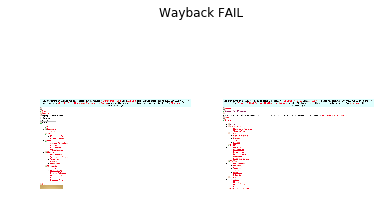

96


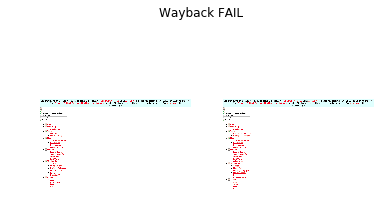

97


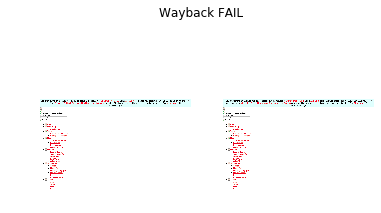

98


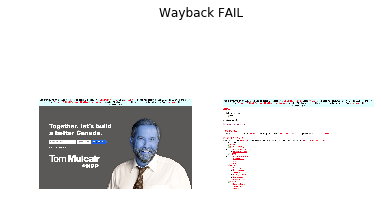

99


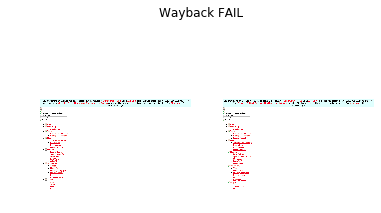

100


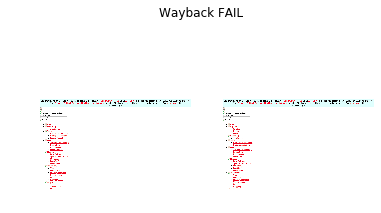

101


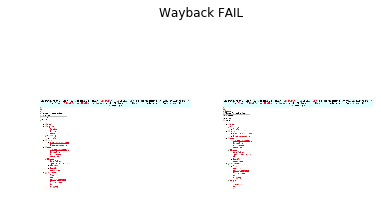

102


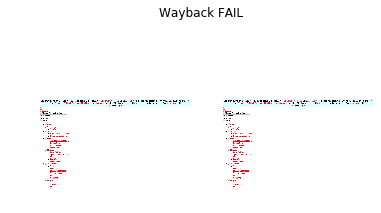

103


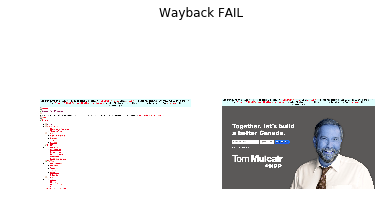

104


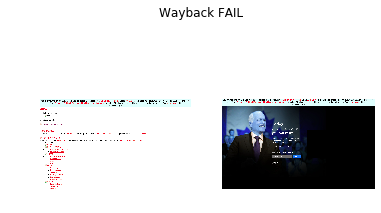

In [14]:
s_in_order = s[:] # make a copy
s_in_order.sort(reverse=True)

neg_s = [-x for x in s]
indices=np.argsort(neg_s)

for x in range(0,len(indices)-1):
    fig = plt.figure()
    plt.suptitle("SSIM: %.2f" % s_in_order[x])
    if s_in_order[x]==-10:
        plt.suptitle("Wayback FAIL")
    print(x)
    imgA = cv2.imread(images[indices[x]])
    imgB = cv2.imread(images[indices[x]+1])

    # show first image
    ax = fig.add_subplot(1, 2, 1)
    plt.imshow(imgA, cmap = plt.cm.gray)
    plt.axis("off")

    # show the second image
    ax = fig.add_subplot(1, 2, 2)
    plt.imshow(imgB, cmap = plt.cm.gray)
    plt.axis("off")

    # show the images
    plt.show()

In [15]:
plt.savefig("figure.png")

<Figure size 432x288 with 0 Axes>

# Save .csv with dates and change metric

In [16]:
lists = [ [] for _ in range(2)]
lists[1] = s
lists[0] = dates
with open(csv_file, "w") as f:
    writer = csv.writer(f)
    writer.writerows(list(map(list, zip(*lists))))